## M161 first question notebook, SVM 
### Data from D:\Github\bigData\part1\joblibCache\dataTrain_cleaned.joblib
(duplicate removal and text processed already including stemming an d lemmatize)

In [2]:
import joblib

dataTrain = joblib.load(r'joblibCache\dataTrain_cleaned.joblib')
dataTrain.head()

,Id,Title,Content,Label
0,227464,come cabl groceri overlord,subscrib one three dink compar speak cabl abl ...,Entertainment
1,244074,presid react happi,presid react happi singer presid took twitter ...,Entertainment
2,60707,wildlif servic,fish wildlif servic comment period addit day p...,Technology
3,27883,launch,natur social medium often sourc real time brea...,Technology
4,169596,u new york casino,u new york casino latest news top deck world e...,Business


In [3]:
dataTrain.info()

<class 'pandas.DataFrame'>
RangeIndex: 111220 entries, 0 to 111219
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Id       111220 non-null  int64
 1   Title    111220 non-null  str  
 2   Content  111220 non-null  str  
 3   Label    111220 non-null  str  
dtypes: int64(1), str(3)
memory usage: 3.4 MB


In [4]:
# # Stratify and keep 50000 instances based on the 'Label' column
# from sklearn.model_selection import train_test_split

# # Stratify and sample 50000 instances
# stratified_data, _ = train_test_split(
#     dataTrain,
#     train_size=50000,
#     stratify=dataTrain['Label'],
#     random_state=42
# )
# dataTrain = stratified_data.reset_index(drop=True)
# print(f"Subset shape (stratified): {dataTrain.shape}")

Label
Entertainment    44527
Technology       29998
Business         24742
Health           11953
Name: count, dtype: int64

Number of unique Labels: 4


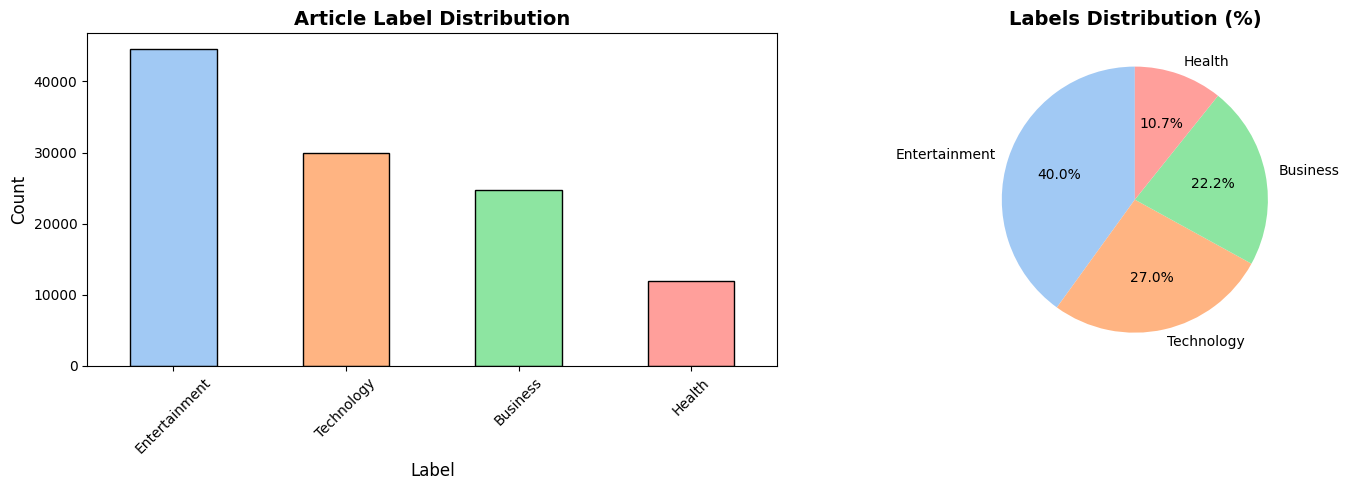

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
category_counts = dataTrain['Label'].value_counts()

print(category_counts)
print(f"\nNumber of unique Labels: {dataTrain['Label'].nunique()}")

# Get a color palette with as many colors as there are categories
palette = sns.color_palette('pastel', n_colors=len(category_counts))

# Bar plot with consistent colors
category_counts.plot(kind='bar', ax=axes[0], color=palette, edgecolor='black')
axes[0].set_title('Article Label Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart with the same colors
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=palette)
axes[1].set_title('Labels Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Starting future extraction (converting text to numbers for ML algorythms to run)
- we should use **Bag of words** based on project requirements 
- Shoud take into account the title column in combination with content ()

### ℹ️info 

- countvetrorizer does convert everyting to lowecase and removes punctuation by default. could remove steps from above Nltk powered code cell
- Title and Content column are combined in to a sing string and then tokenized and vectorized

In [6]:
# Combine 'Title' and 'Content' columns into a single string
# and vectorize the result for classification
from sklearn.feature_extraction.text import CountVectorizer

# Create a new column that combines Title and Content
# (if either column is missing, fill with empty string)
dataTrain['Combined'] = dataTrain['Title'].fillna('') + ' ' + dataTrain['Content'].fillna('')

# Initialize CountVectorizer (Bag of Words)
bow_vectorizer = CountVectorizer(binary=True, max_features=5000)  # Use binary=True for presence/absence of words, limit to top 5000 features

# Fit and transform the combined column
dataTrain_bow = bow_vectorizer.fit_transform(dataTrain['Combined'])

# Show shape and a sample
print('Bag of Words matrix shape:', dataTrain_bow.shape)
print("dataTrain_bow sample (first 10 rows):", dataTrain_bow[:10].toarray())
print('Feature names (first 20):', bow_vectorizer.get_feature_names_out()[:20])

Bag of Words matrix shape: (111220, 5000)
dataTrain_bow sample (first 10 rows): [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature names (first 20): ['aa' 'abandon' 'abdomin' 'abid' 'abil' 'abl' 'abnorm' 'aboard' 'abort'
 'abroad' 'abrupt' 'abruptli' 'absenc' 'absent' 'absolut' 'absorb'
 'absurd' 'abu' 'abund' 'abus']


### visual check for weird words, repetitions, etc...
- remember stemming and lemmatization was executed on text

In [7]:
print('Feature names (first 100):', bow_vectorizer.get_feature_names_out()[:1000])

Feature names (first 100): ['aa' 'abandon' 'abdomin' 'abid' 'abil' 'abl' 'abnorm' 'aboard' 'abort'
 'abroad' 'abrupt' 'abruptli' 'absenc' 'absent' 'absolut' 'absorb'
 'absurd' 'abu' 'abund' 'abus' 'academ' 'academi' 'acceler' 'accent'
 'accept' 'access' 'accessori' 'accid' 'accident' 'accommod' 'accompani'
 'accomplish' 'accord' 'accordingli' 'account' 'accumul' 'accur'
 'accuraci' 'accus' 'ace' 'achiev' 'acid' 'ackman' 'acknowledg' 'acoust'
 'acquir' 'acquisit' 'across' 'act' 'action' 'activ' 'activist' 'actor'
 'actress' 'actual' 'acut' 'ad' 'adapt' 'add' 'addict' 'addit' 'address'
 'adequ' 'adjust' 'administr' 'admir' 'admiss' 'admit' 'admittedli' 'adob'
 'adolesc' 'adopt' 'ador' 'adult' 'adulthood' 'advanc' 'advantag'
 'adventur' 'advers' 'advertis' 'advic' 'advis' 'advisor' 'advisori'
 'advoc' 'advocaci' 'aerial' 'aesthet' 'affair' 'affect' 'affili' 'afford'
 'afraid' 'aftermath' 'afternoon' 'afterward' 'age' 'agenc' 'agenda'
 'agent' 'aggreg' 'aggress' 'ago' 'agre' 'agreement' 'a

## SVM calssifier (SGDC implementation)

In [ ]:
# SGDClassifier (SVM/linear) with 5-fold cross-validation on Bag of Words features
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Use the same Bag of Words features as before
X = dataTrain_bow.toarray()
y = dataTrain['Label'].values

# Create a pipeline: StandardScaler + SGDClassifier
sgd_pipeline = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', random_state=42, n_jobs=6))

# Perform 5-fold cross-validation using accuracy
cv_scores_acc = cross_val_score(sgd_pipeline, X, y, cv=5, scoring='accuracy', n_jobs=6)
print('SGDClassifier (hinge, scaled) 5-fold CV accuracy scores:', cv_scores_acc)
print('Mean CV accuracy:', np.mean(cv_scores_acc))


SGDClassifier (hinge) 5-fold CV accuracy scores: [0.93841036 0.93476893 0.93733142 0.93921956 0.93557813]
Mean CV accuracy: 0.937061679554037
